In [1]:
import gym
import gym_anytrading

from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('S&P.csv')

In [3]:
df

,Date,Open,High,Low,Close
0,06/30/23,4422.44,4458.48,4422.44,4450.38
1,06/29/23,4374.94,4398.39,4371.97,4396.44
2,06/28/23,4367.48,4390.35,4360.22,4376.86
3,06/27/23,4337.36,4384.42,4335.00,4378.41
4,06/26/23,4344.84,4362.06,4328.08,4328.82
...,...,...,...,...,...
2256,07/15/14,1977.36,1982.52,1965.34,1973.28
2257,07/14/14,1969.86,1979.85,1969.86,1977.10
2258,07/11/14,1965.76,1968.67,1959.63,1967.57
2259,07/10/14,1966.67,1969.84,1952.86,1964.68


In [4]:
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

In [6]:
df.sort_values('Date',ascending=True,inplace=True)
df.set_index('Date',inplace=True)

In [7]:
df.head(10)

,Open,High,Low,Close
Date,,,,
2014-07-09,1965.10,1974.15,1965.10,1972.83
2014-07-10,1966.67,1969.84,1952.86,1964.68
2014-07-11,1965.76,1968.67,1959.63,1967.57
2014-07-14,1969.86,1979.85,1969.86,1977.10
2014-07-15,1977.36,1982.52,1965.34,1973.28
2014-07-16,1976.35,1983.94,1975.67,1981.57
2014-07-17,1979.75,1981.80,1955.59,1958.12
2014-07-18,1961.54,1979.91,1960.82,1978.22
2014-07-21,1976.93,1976.93,1965.77,1973.63


In [8]:
env = gym.make('stocks-v0',df=df,frame_bound=(100,2160),window_size=10)

In [9]:
env.signal_features

array([[ 2.03933e+03,  0.00000e+00],
       [ 2.03982e+03,  4.90000e-01],
       [ 2.04132e+03,  1.50000e+00],
       ...,
       [ 4.11921e+03,  4.26100e+01],
       [ 4.17976e+03,  6.05500e+01],
       [ 4.13648e+03, -4.32800e+01]])

In [10]:
env.action_space

Discrete(2)

{'total_reward': 623.2699999999895, 'total_profit': 0.0007536499354773702, 'position': 1}


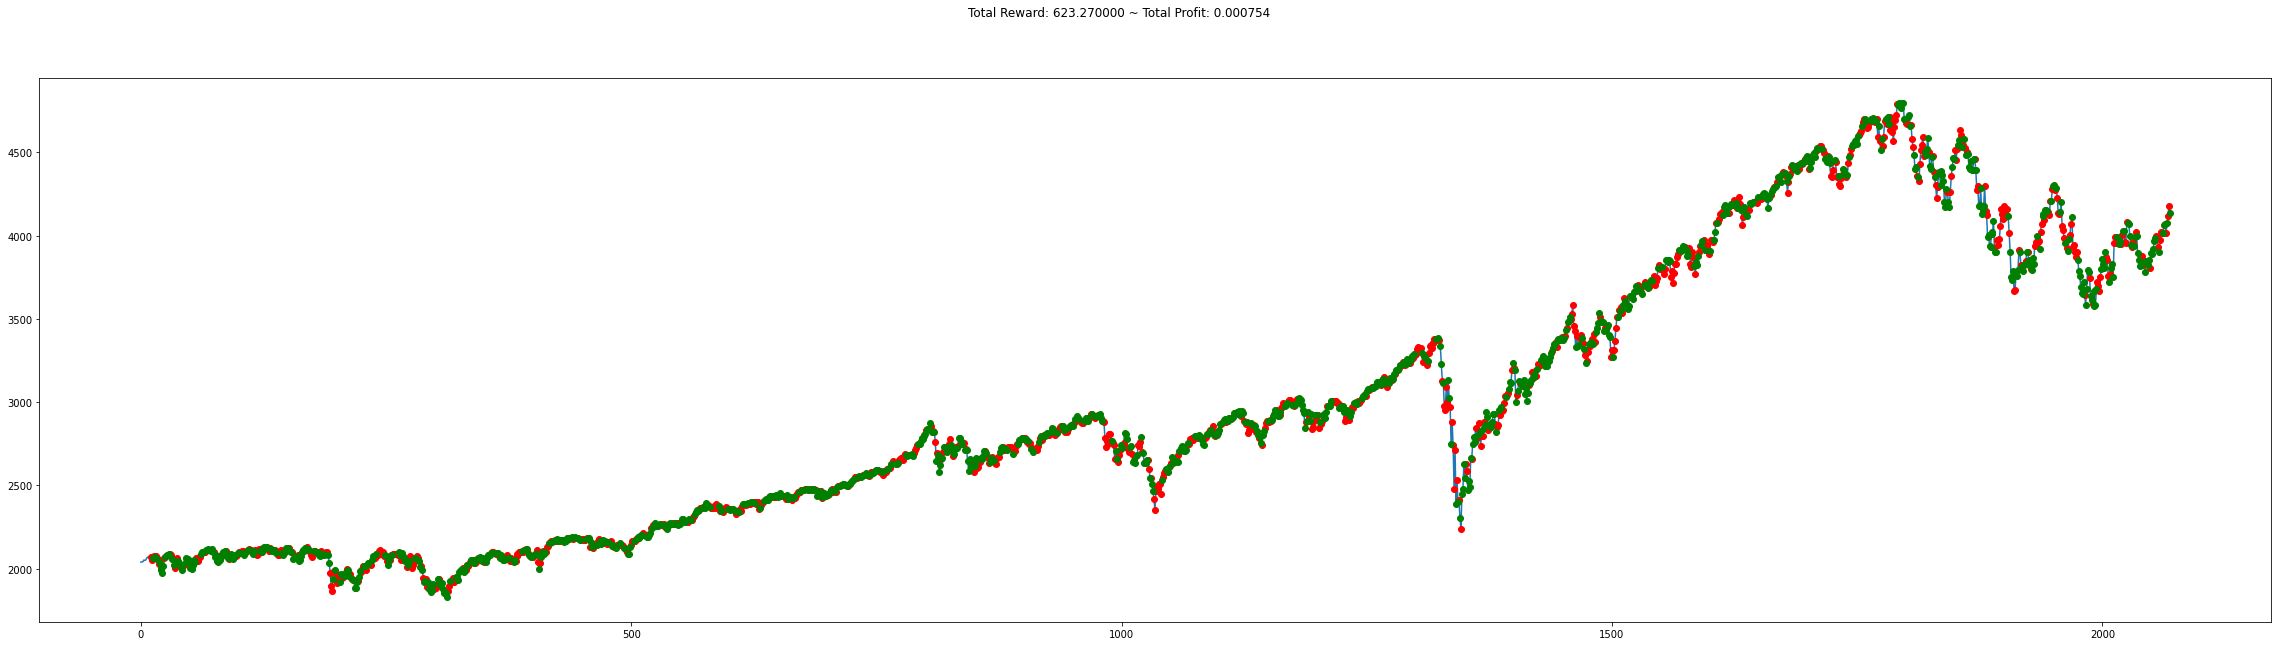

In [11]:
state = env.reset()

while True:
    action = env.action_space.sample()
    next_state,reward,done,info = env.step(action)

    if done:
        print(info)
        break

plt.figure(figsize=(40,10))
plt.cla()
env.render_all()
plt.show()

In [12]:
env_training = lambda: gym.make('stocks-v0',df=df,frame_bound=(100,2160),window_size=10)

In [13]:
env = DummyVecEnv([env_training])

In [14]:
#Create Model

model = A2C('MlpPolicy',env,verbose=1)
model.learn(total_timesteps=100_000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 1837     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.0278  |
|    value_loss         | 0.00197  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1908     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 2.23     |
|    value_loss      

In [15]:
env = gym.make('stocks-v0',frame_bound=(2160,2260),df=df,window_size=10)
obs = env.reset()
while True:

    obs = obs[np.newaxis,...]
    action, states = model.predict(obs)
    obs, rewards, done, info = env.step(action)

    if done:
        print(info)
        break

{'total_reward': 105.1299999999992, 'total_profit': 0.7143930817506129, 'position': 0}


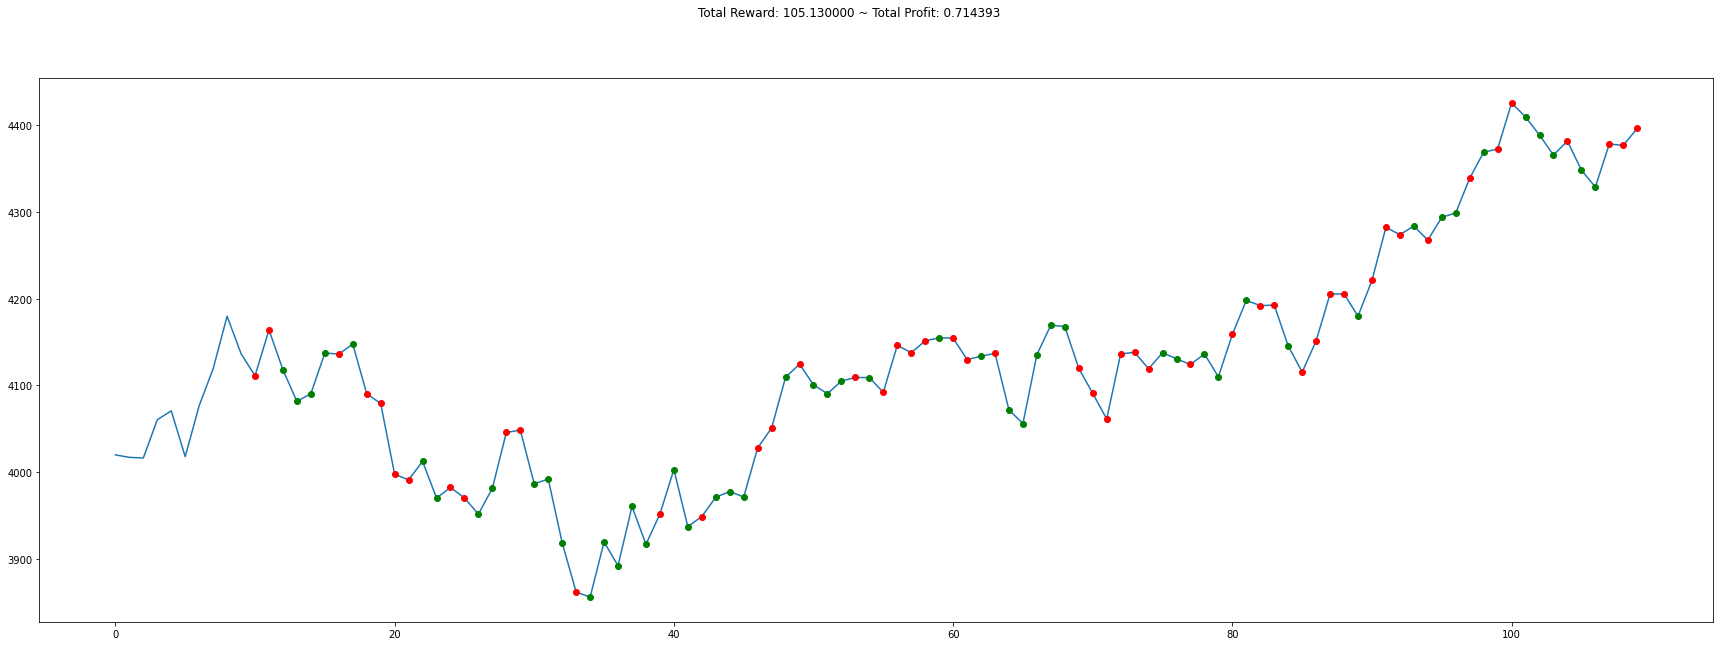

In [18]:
plt.figure(figsize=(30,10))
plt.cla()
env.render_all()
plt.show()

In [29]:
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()
data = pdr.get_data_yahoo('SPY',start='2015-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [30]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,176.134644,121465900
2015-01-05,204.169998,204.369995,201.350006,201.720001,172.953644,169632600
2015-01-06,202.089996,202.720001,198.860001,199.820007,171.324615,209151400
2015-01-07,201.419998,202.720001,200.880005,202.309998,173.459518,125346700
2015-01-08,204.009995,206.160004,203.990005,205.899994,176.537567,147217800
...,...,...,...,...,...,...
2022-12-23,379.649994,383.059998,378.029999,382.910004,380.042480,59857300
2022-12-27,382.790009,383.149994,379.649994,381.399994,378.543793,51638200
2022-12-28,381.329987,383.390015,376.420013,376.660004,373.839264,70911500


In [32]:
from ta import add_all_ta_features

df2 = add_all_ta_features(data,open='Open',high='High',low='Low',close='Close',volume='Volume',fillna=True)

c:\Users\Saashiv\anaconda3\envs\py36\lib\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
c:\Users\Saashiv\anaconda3\envs\py36\lib\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [33]:
df2

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,176.134644,121465900,-8.997983e+06,121465900,-0.074078,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.429993,-31.007186,0.000000,0.000000
2015-01-05,204.169998,204.369995,201.350006,201.720001,172.953644,169632600,-1.370654e+08,-48166700,-0.470856,-6.293355e+08,...,-0.144258,-0.028852,-0.115407,3.073055,0.614611,2.458444,203.820592,-1.805964,-1.822470,-1.805964
2015-01-06,202.089996,202.720001,198.860001,199.820007,171.324615,209151400,-2.421822e+08,-257318100,-0.484122,-5.961999e+08,...,-0.330152,-0.089112,-0.241041,7.588833,2.009455,5.579377,202.075642,-0.941897,-0.946361,-2.730850
2015-01-07,201.419998,202.720001,200.880005,202.309998,173.459518,125346700,-1.726971e+08,-131971400,-0.276052,-4.664411e+08,...,-0.375141,-0.146318,-0.228823,6.081981,2.823961,3.258021,202.178604,1.246117,1.238416,-1.518763
2015-01-08,204.009995,206.160004,203.990005,205.899994,176.537567,147217800,-6.075870e+07,15246400,-0.078620,-3.243050e+08,...,-0.265770,-0.170208,-0.095562,6.089255,3.477019,2.612236,203.620224,1.774503,1.758942,0.228789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,379.649994,383.059998,378.029999,382.910004,380.042480,59857300,1.397365e+10,-1773349100,-0.013259,-1.177222e+08,...,-0.632900,-0.054298,-0.578602,-0.034964,1.781180,-1.816144,388.933949,0.575227,0.573578,86.394401
2022-12-27,382.790009,383.149994,379.649994,381.399994,378.543793,51638200,1.397365e+10,-1824987300,0.015152,-1.120439e+08,...,-0.716537,-0.186746,-0.529791,-3.299711,0.765002,-4.064713,388.132491,-0.394351,-0.395131,85.659352
2022-12-28,381.329987,383.390015,376.420013,376.660004,373.839264,70911500,1.390762e+10,-1895898800,-0.022129,-1.440547e+08,...,-0.872274,-0.323852,-0.548422,-4.015526,-0.191104,-3.824422,386.046254,-1.242787,-1.250574,83.352002


In [34]:
pd.set_option('display.max_columns',None)

In [35]:
df2

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_atr,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_stc,trend_adx,trend_adx_pos,trend_adx_neg,trend_cci,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,176.134644,121465900,-8.997983e+06,121465900,-0.074078,0.000000e+00,0.000000,0.000000,-3.777034e+07,205.496663,50.000000,1000.000000,205.429993,205.429993,205.429993,0.000000,0.000000,0.0,0.0,205.496663,208.196676,202.796651,2.627792,0.487654,0.0,0.0,204.179993,206.880005,205.529999,1.314322,0.462961,0.000000,0.000000,0.000000,0.000000,0.000000,205.429993,205.429993,205.429993,205.429993,0.000000,0.000000,0.000000,-30.559890,1.000000,92.325643,-310.071857,-310.071857,0.000000,205.529999,205.529999,205.529999,205.529999,0.000000,0.000000,0.000000,0.000000,0.000000,295.831846,292.949929,4.0,4.0,0.0,198.860001,206.880005,0.0,0.0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.296087,46.296087,-53.703913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.429993,-31.007186,0.000000,0.000000
2015-01-05,204.169998,204.369995,201.350006,201.720001,172.953644,169632600,-1.370654e+08,-48166700,-0.470856,-6.293355e+08,-4.753429,-4.753429,-4.072666e+07,203.738756,0.000000,1000.000000,203.574997,207.284988,199.865005,3.644840,0.250000,0.0,0.0,203.988332,206.848333,201.128332,2.804083,0.103439,0.0,0.0,201.350006,206.880005,204.115005,2.716443,0.066907,0.000000,0.000000,-0.295954,-0.059191,-0.236763,203.574997,203.574997,204.859225,205.155178,0.001946,0.056628,-0.054682,-0.003527,2.018872,94.180639,-316.301784,-313.186820,-3.114963,204.115005,204.115005,204.115005,204.115005,0.000000,0.000000,0.000000,0.000000,-66.666667,295.831846,292.949929,4.0,8.0,-4.0,198.860001,206.880005,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-100.000000,5.457156,6.690691,26.493389,-93.309309,0.000000,0.000000,-0.144258,-0.028852,-0.115407,3.073055,0.614611,2.458444,203.820592,-1.805964,-1.822470,-1.805964
2015-01-06,202.089996,202.720001,198.860001,199.820007,171.324615,209151400,-2.421822e+08,-257318100,-0.484122,-5.961999e+08,-3.820295,-4.286862,-5.033493e+06,202.370717,0.000000,1000.000000,202.323334,206.982659,197.664009,4.605821,0.231364,0.0,0.0,202.814445,206.007779,199.621111,3.149020,0.031142,0.0,0.0,198.860001,206.880005,202.870003,3.963954,0.119702,0.000000,0.000000,-0.676020,-0.182557,-0.493463,202.323334,202.323334,204.083961,204.759981,0.015367,0.108752,-0.093385,-0.011066,3.097052,95.432302,-320.505443,-315.626361,-4.879082,202.870003,202.870003,202.870003,202.870003,0.000000,0.000000,0.000000,0.000000,-87.531075,295.831846,292.949929,4.0,12.0,-8.0,198.860001,206.880005,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-100.000000,12.500018,11.970152,21.6

In [39]:
from gym_anytrading.envs import StocksEnv

def my_processed_data(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Close','Volume','momentum_rsi','volume_obv','trend_macd_diff']].to_numpy()[start:end]
    return prices, signal_features

class MyCustomEnv(StocksEnv):
    _process_data = my_processed_data

In [40]:
env2 = MyCustomEnv(df=df2,window_size=10,frame_bound=(100,2000))

In [41]:
env2.signal_features

array([[ 2.10020004e+02,  9.46679000e+07,  5.11643311e+01,
        -6.32061400e+08, -8.45975753e-02],
       [ 2.12210007e+02,  9.59340000e+07,  5.75413709e+01,
        -5.36127400e+08,  5.21181957e-02],
       [ 2.12440002e+02,  7.65101000e+07,  5.81593030e+01,
        -4.59617300e+08,  1.45909845e-01],
       ...,
       [ 3.93160004e+02,  6.59279000e+07,  4.96279876e+01,
        -1.63860530e+09, -1.14684534e+00],
       [ 3.96239990e+02,  6.07379000e+07,  5.23299146e+01,
        -1.57786740e+09, -1.28899794e+00],
       [ 3.93279999e+02,  8.14477000e+07,  4.95776117e+01,
        -1.65931510e+09, -1.54581022e+00]])

In [42]:
training_env = lambda:env2
env = DummyVecEnv([training_env])

model = A2C('MlpPolicy',env,verbose=1)
model.learn(total_timesteps=1_000_000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 1776     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.49    |
|    value_loss         | 0.796    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1772     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.684   |
|    explained_variance | 0.532    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -1.36    |
|    value_loss      

In [46]:
env = MyCustomEnv(df=df2,window_size=10,frame_bound=(100,2000))
obs = env.reset()

while True:
    obs = obs[np.newaxis,...]
    action, states = model.predict(obs)
    obs,rewards,done,info = env.step(action)

    if done:
        print(info)
        break

{'total_reward': 298.1000213623047, 'total_profit': 0.04800695979321463, 'position': 1}


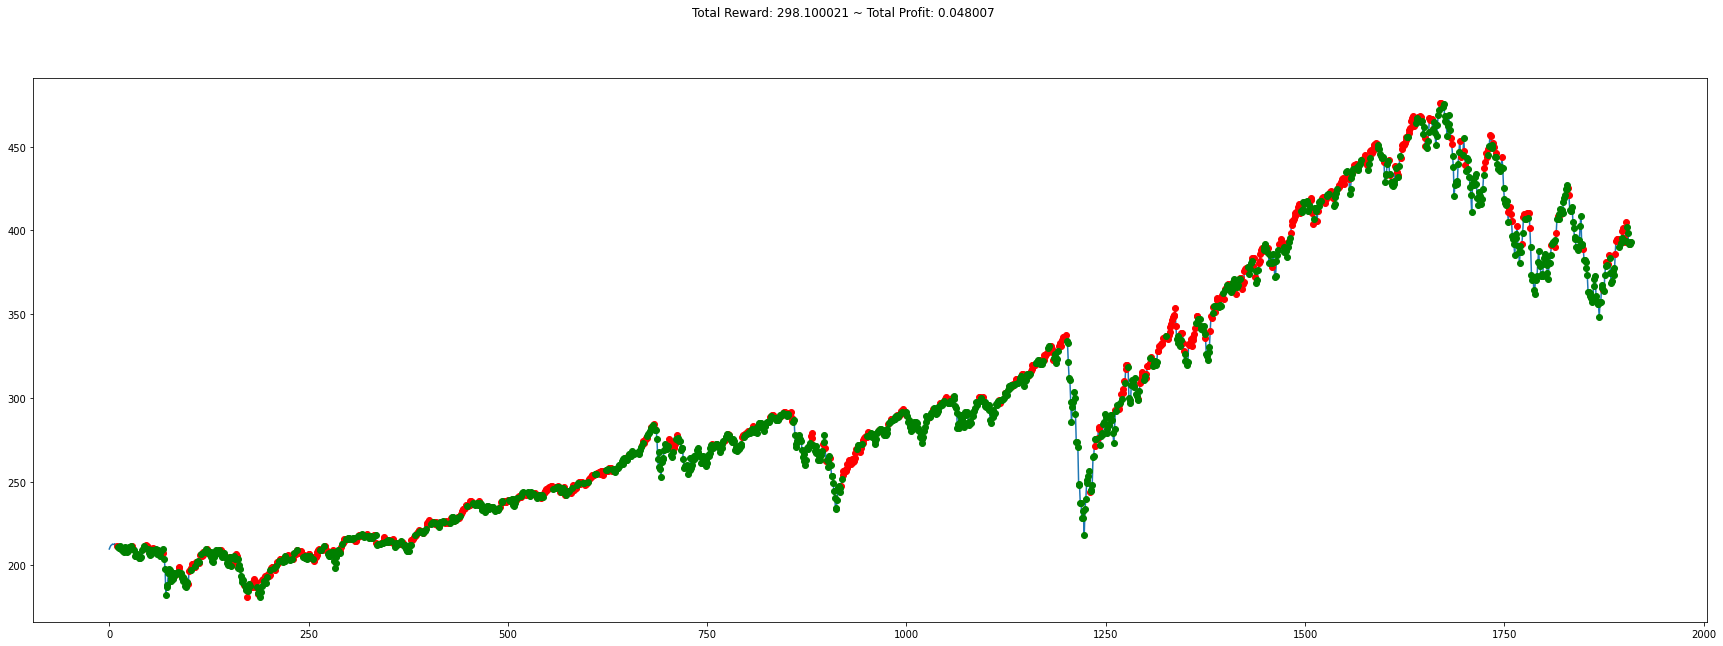

In [47]:
plt.figure(figsize=(30,10))
plt.cla()
env.render_all()
plt.show()